In [1]:
import os
from PIL import Image
from torch.utils.data import Dataset
import torch.utils.data as data
from torchvision import datasets, transforms, utils
import torch
from torchvision.utils import save_image
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import wandb

from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# going to the right directory
print(os.getcwd())
os.chdir("E:\DL_data")
print(os.getcwd())

# defining the directories
root_dir = os.getcwd()
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')
categories = os.listdir(train_dir)

c:\Users\Jimmy Walraff\OneDrive\Documents\Ulg\Master 1\Deep Learning
E:\DL_data


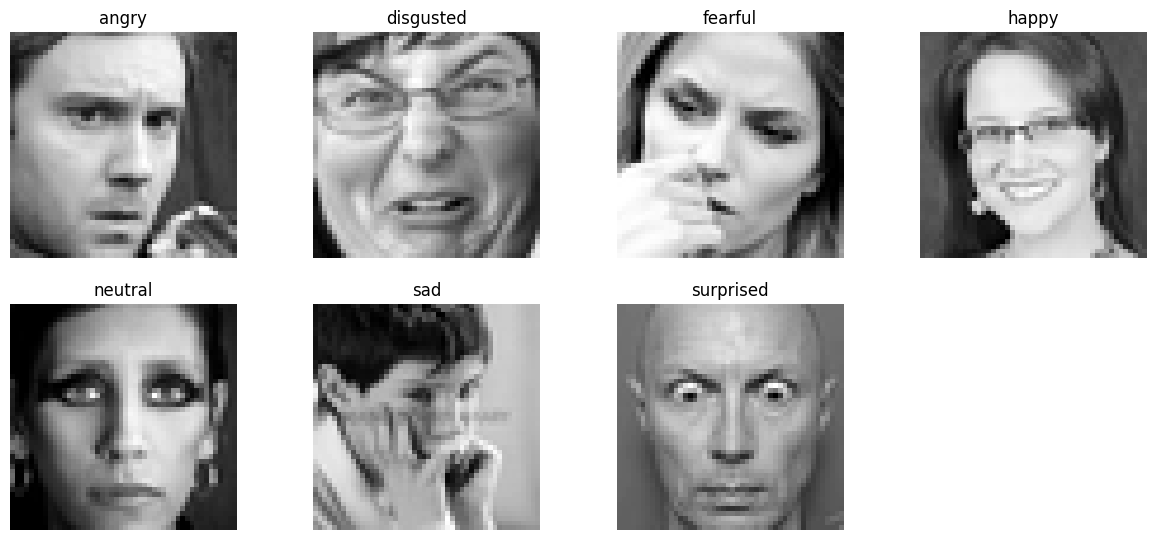

In [3]:
# Give an example of each category
plt.figure(figsize=(15, 10))

for i, category in enumerate(categories):
    cat_path = os.path.join(train_dir, category)
    img_path = os.path.join(cat_path, os.listdir(cat_path)[0])
    img = Image.open(img_path)
    plt.subplot(3, 4, i+1)
    plt.title(category)
    plt.imshow(img, cmap='gray')
    plt.axis('off')

# LA VARIABLE TRANSFORM_TRAIN EST A MODIFIER AVEC L'ARRAY DE TRANSFORM QUE TU VEUX, LES NAMES SONT AUSSI A MODIFIER
# LE SIMPLE TRANSFORM EST JUSTE POUR RESIZE LES PHOTOS
# LE FOLDER OUTPUT EST ORGANISE COMME CECI => DeepLearning/train ou validation ou test/categories, SAUF QUE DANS LE FOLDER DE BASE Y A PAS DE VALIDATION => SI VALIDATION DANS INPUT C'EST TRAIN, IL FAUT QUE TU CREES CE DIRECTORY AVANT DE RUN
# PUIS APRES J'ITERE DANS LES DIFFERENTS FOLDER DE L'INPUT FOLDER (CATEGORY)
# PUIS J'ITERE SUR LES FILES DANS LE FOLDER DE L'EMOTION
# PUIS J'ITERE SUR LES TRANSFORMS ET SAVE LES IMAGES TRANSFORMEE
# IL FAUT DONC CHANGER LE DATASET POUR QUE CA SOIT COHERENT (JUSTE ALLER CHERCHER L'IMAGE PATH DANS LE INIT, PUIS DANS LE GET ITEM OUVRIR L'IMAGE)

# A MODIFIER

In [ ]:
output_dir = "E:\DeepLearning_data_test"

transform_train = [transforms.Compose([
            transforms.RandomRotation(10),
            transforms.ToTensor()
        ])]

transforms_train_name = ["RandomHorizontalFlip"]

simple_transform = [transforms.Compose([
            transforms.Resize((300, 300)),
            transforms.ToTensor()
        ])]

for folder in ["train", "validation", "test"]:
    input = folder
    if folder == "validation":
        input = "train"

    print(f"Processing {folder} folder")        
    for category in categories:
        input_folder = os.path.join(root_dir, input, category)
        output_folder = os.path.join(output_dir, folder, category)

        array = os.listdir(input_folder)

        if folder == "train":
            array = array[:int(len(array)*0.8)]
        elif folder == "validation":
            array = array[int(len(array)*0.8):]

        print(f"Processing {category} category")
        for i, filename in enumerate(array):
            # print(f"filename = {filename}")
            path = os.path.join(input_folder, filename)
            # print(f"path = {path}")
            image = Image.open(path)

            if folder == "train":
                transform = transform_train
            else:
                transform = simple_transform

            if i % 500 == 0:
                print(f"Processing image {i}")
            for i, transf in enumerate(transform):
                image_transformed = transf(image)
                
                if folder == "train":
                    name_of_the_image = f"{filename}_{transforms_train_name[i]}.png"
                else:
                    name_of_the_image = f"{filename}.png"

                save_image(image_transformed, os.path.join(output_folder, name_of_the_image))